In [1]:
import seaborn as sns
import pandas as pd 
import datetime as datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
# Read data from file 'filename.csv' |
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
pd.options.display.float_format = '{:,.2f}'.format
data = pd.read_csv("/home/anconam/projects/Shapley_Pruning/experiments/results/log.csv") 
data['timestamp'].apply(lambda row: str(row))
data.tail()

,timestamp,epoch,train_acc,test_acc,test_acc_pp,train_loss,test_loss,test_loss_pp,n_params,flops,n_params_full,layers,train_time,prune_time,experiment
292,20200202T151347,0.33,0.00,0.93,0.92,0.00,0.22,0.22,"81,907,712.00","7,551,746.00","156,094,464.00",1832-64-32,0.00,9.78,fmnist__sv-loss-99p#5_s:0.2_steps:2_start:0_in...
293,20200202T151347,0.67,0.00,0.92,0.92,0.00,0.22,0.25,"48,746,496.00","3,395,462.00","156,094,464.00",820-64-32,0.00,3.08,fmnist__sv-loss-99p#5_s:0.2_steps:2_start:0_in...
294,20200202T151405,0.00,0.00,0.93,0.93,0.00,0.23,0.23,"156,094,464.00","16,849,994.00","156,094,464.00",4096-64-32,0.00,0.00,fmnist__weight_s:0.2_steps:2_start:0_int:1_loa...
295,20200202T151405,0.33,0.00,0.93,0.92,0.00,0.23,0.23,"81,907,712.00","7,551,746.00","156,094,464.00",1832-64-32,0.00,0.14,fmnist__weight_s:0.2_steps:2_start:0_int:1_loa...
296,20200202T151405,0.67,0.00,0.92,0.89,0.00,0.23,0.39,"48,746,496.00","3,395,462.00","156,094,464.00",820-64-32,0.00,0.07,fmnist__weight_s:0.2_steps:2_start:0_int:1_loa...


### FMNIST CNN 1.8M parameters

In [2]:
dataset = "cifar10"

plot_df = data[data["experiment"].str.startswith(dataset)]
# plot_df = plot_df[plot_df["timestamp"] >= "steps:1"]
plot_df = plot_df[plot_df["experiment"].str.contains("gap:0")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("in1ep")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("random")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("30steps")]

# Some processing
# Some processing
plot_df['test_acc'] *= 100
plot_df['test_acc_pp'] *= 100
plot_df['train_acc'] *= 100
plot_df["total_time"] = plot_df["train_time"] + plot_df["prune_time"]
plot_df["sparsity"] = plot_df["n_params"] / plot_df["n_params_full"] * 100
plot_df["test_acc_gap"] = (plot_df["test_acc"] - plot_df["test_acc"].max())
plot_df["total_time_cum"] = plot_df.groupby(['experiment', 'timestamp'])['total_time'].apply(lambda x: x.cumsum())



In [3]:
plot_df[plot_df["epoch"] == 25]


,timestamp,epoch,train_acc,test_acc,test_acc_pp,train_loss,test_loss,test_loss_pp,n_params,flops,n_params_full,layers,train_time,prune_time,experiment,total_time,sparsity,test_acc_gap,total_time_cum


In [4]:
df_join = plot_df.join(plot_df.groupby(["timestamp"])["test_loss"].min(), on="timestamp", rsuffix="_min")
df_join = df_join[df_join["test_loss"] == df_join["test_loss_min"]]
std = df_join.groupby(["experiment"]).std().sort_values(by=["test_acc"], ascending=False)
df_join = df_join.groupby(["experiment"]).mean().sort_values(by=["test_acc"], ascending=False)
df_join["test_acc_std"] = std["test_acc"]
df_join.filter(["experiment", "test_acc_pp","test_acc_std", "test_acc_gap", "sparsity", "epoch", "test_loss"])

,test_acc_pp,test_acc_std,test_acc_gap,sparsity,epoch,test_loss
experiment,,,,,,


In [5]:
# Rank pruning methods by best test accuracy during training and sparsity at that stage
# df_join = plot_df[plot_df["sparsity"] < 100]
# df_join = df_join[df_join["epoch"] > 25]

df_join = plot_df[plot_df["epoch"] == 25]
df_join = df_join.join(df_join.groupby(["timestamp"])["test_acc"].max(), on="timestamp", rsuffix="_max")
df_join = df_join[df_join["test_acc"] == df_join["test_acc_max"]]
std = df_join.groupby(["experiment"]).std().sort_values(by=["test_acc"], ascending=False)
df_join = df_join.groupby(["experiment"]).mean().sort_values(by=["test_acc"], ascending=False)
df_join["test_acc_std"] = std["test_acc"]

df_join.filter(["experiment", "test_acc","test_acc_pp", "test_acc_std", "test_acc_gap", "layers", "sparsity", "flops", "epoch", "test_loss"])

,test_acc,test_acc_pp,test_acc_std,test_acc_gap,sparsity,flops,epoch,test_loss
experiment,,,,,,,,


Accuracy
                                                    test_acc_pp
experiment                                                     
cifar10__count_gap:2.0_steps:16_start:0_int:1_l...        93.47
cifar10__grad_gap:2.0_steps:16_start:0_int:1_lo...        93.56
cifar10__random_gap:2.0_steps:16_start:0_int:1_...        93.47
cifar10__sv-loss#5_gap:2.0_steps:16_start:0_int...        93.49
cifar10__sv-loss-2std#5_gap:2.0_steps:16_start:...        93.49
cifar10__sv-loss-97p#5_gap:2.0_steps:16_start:0...        93.52
cifar10__sv-loss-99p#5_gap:2.0_steps:16_start:0...        93.53
cifar10__taylor-abs_gap:2.0_steps:16_start:0_in...        93.52
cifar10__taylor_gap:2.0_steps:16_start:0_int:1_...        93.47
cifar10__weight_gap:2.0_steps:16_start:0_int:1_...        93.51
Training time
                                                    train_time  prune_time
experiment                                                                
cifar10__count_gap:2.0_steps:16_start:0_int:1_l...      349

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


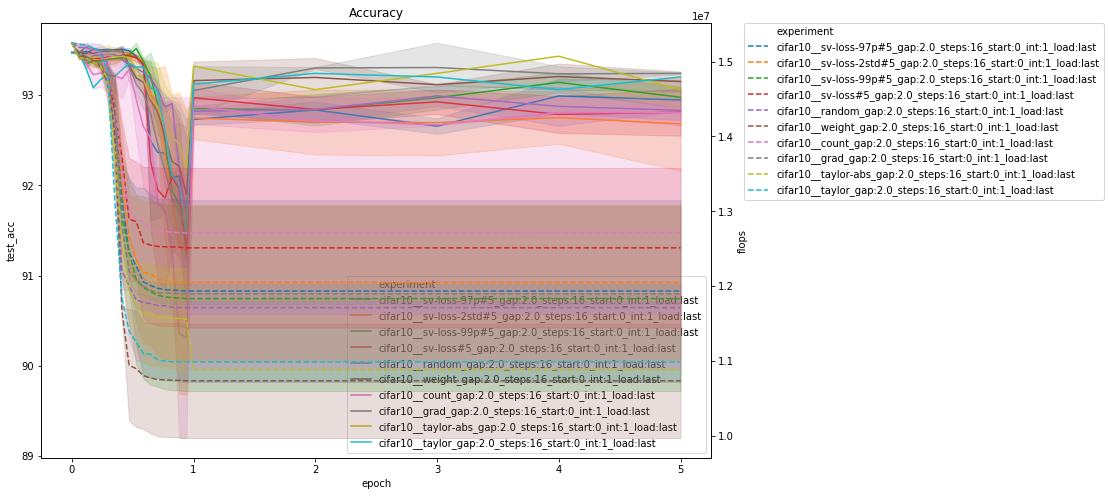

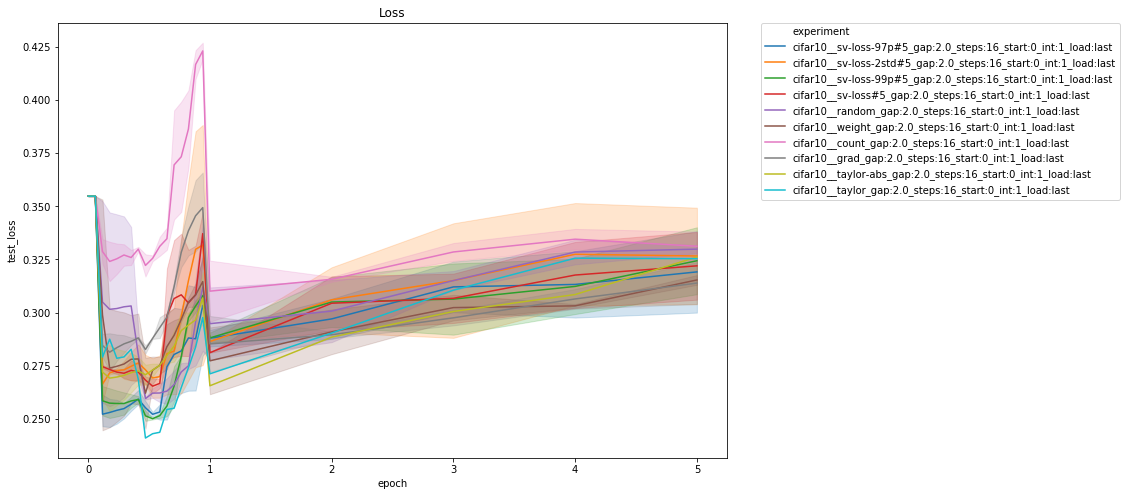

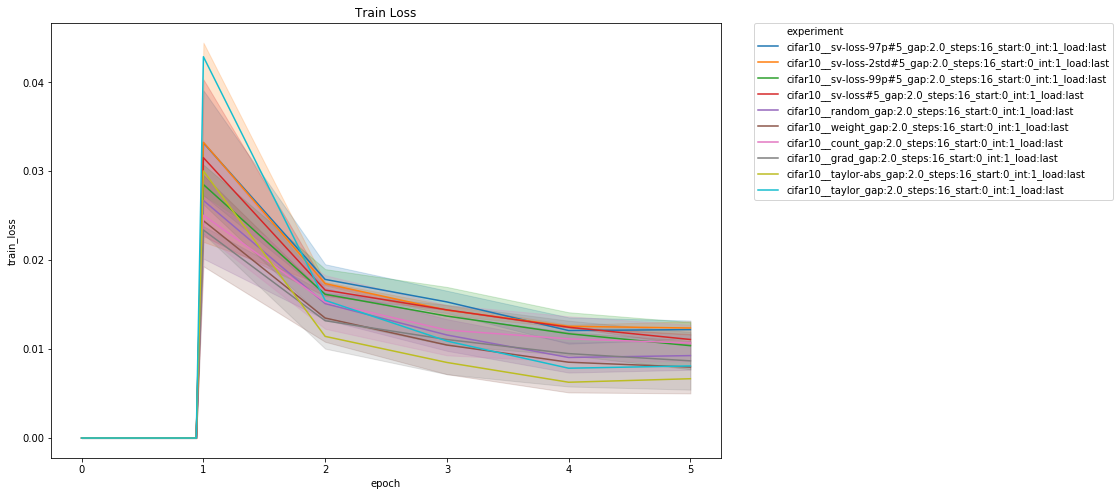

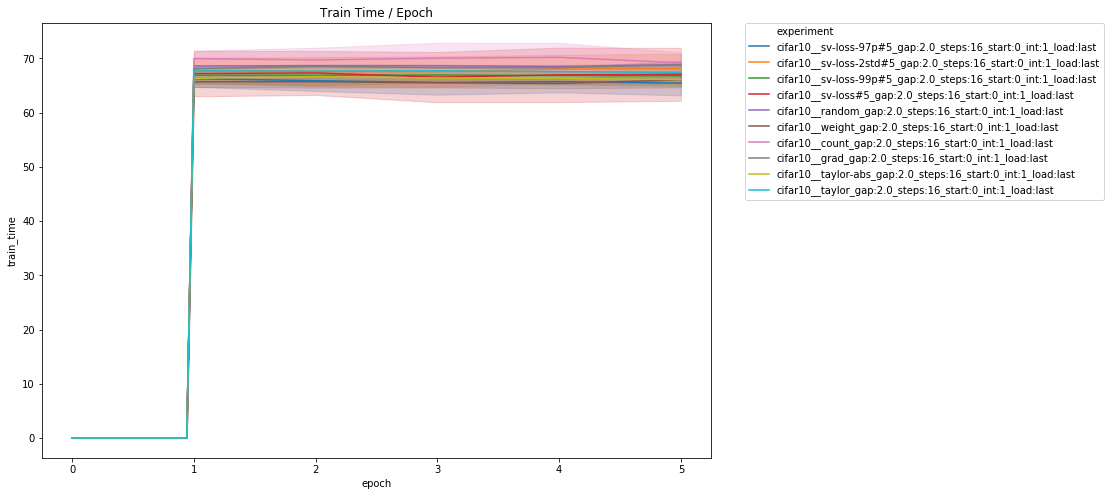

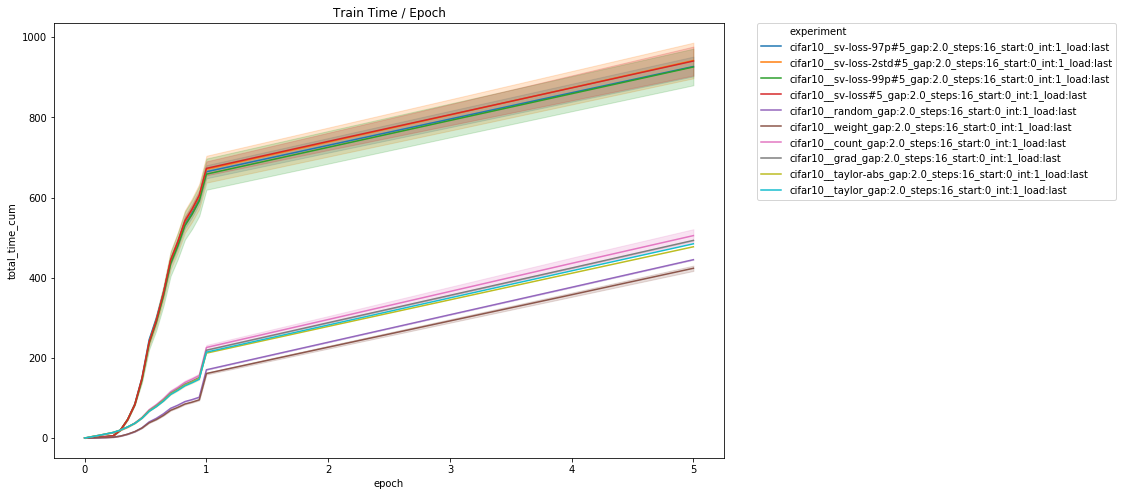

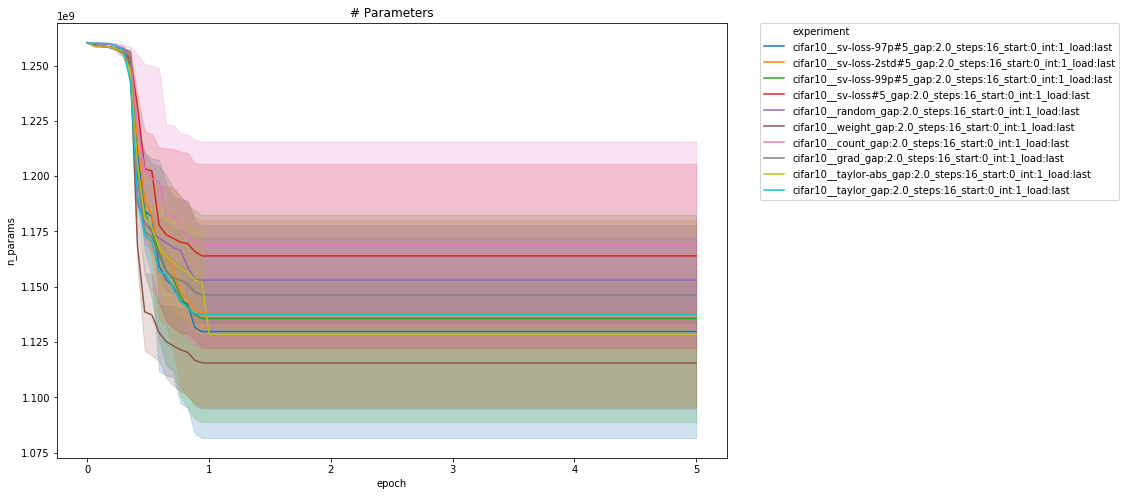

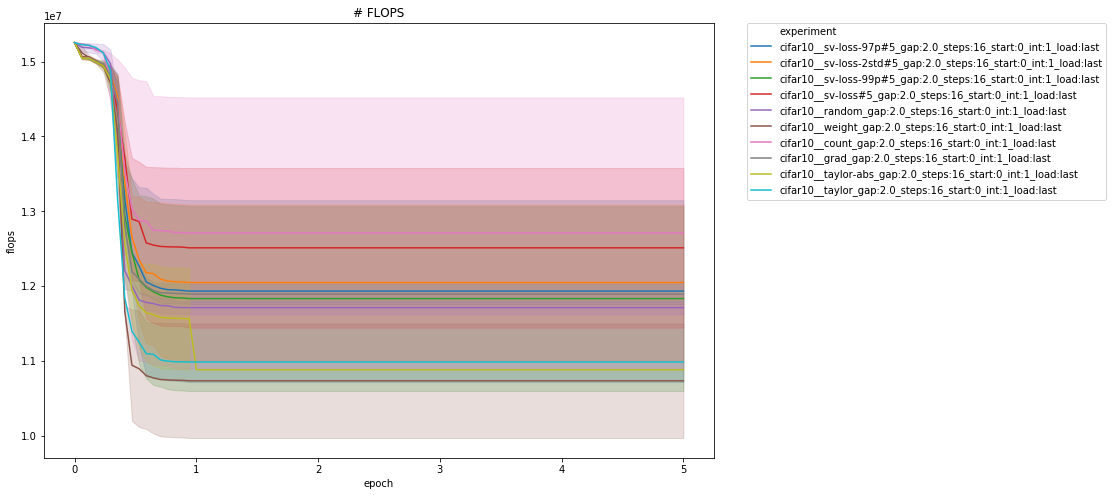

In [5]:


# Print train time
print ("Accuracy")
performance_df = plot_df.groupby(['experiment', 'timestamp']).max()
performance_df = performance_df.groupby(['experiment']).mean()
print (performance_df.filter(items=["experiment", "test_acc_pp"]))

# Print train time
print ("Training time")
time_df = plot_df.groupby(['experiment', 'timestamp']).sum()
time_df = time_df.groupby(['experiment']).mean()
print (time_df.filter(items=["experiment", "train_time", "prune_time"]))

# Weight sparsity
print ("Sparsity")
initial_params = np.max(list(plot_df.groupby(['experiment'])["n_params"].max()))
# print (initial_params)
sparsity_df = plot_df.groupby(['experiment', 'timestamp']).min()
sparsity_df = sparsity_df.groupby(['experiment']).min()
print (sparsity_df.filter(items=["experiment", "n_params"]) / initial_params * 100)


# for label in plotting_data:
plt.figure(figsize=(12,8))
sns.lineplot(x="epoch", y="test_acc", hue="experiment", data = plot_df)
ax2 = plt.twinx()
sns.lineplot(x="epoch", y="flops", data=plot_df, linestyle="dashed", hue="experiment", ax=ax2,)
for l in ax2.lines:
    l.set_linestyle("--")

plt.title("Accuracy")
# plt.ylim([10, 100])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plt.figure(figsize=(12,8))
# new_plot = plot_df
# new_plot["train_time_cum"] = new_plot.groupby(['experiment', 'timestamp'])['train_time'].apply(lambda x: x.cumsum())
# sns.lineplot(x="train_time_cum", y="test_acc", hue="experiment", data = new_plot)
# plt.title("Accuracy / Wall-clock Time")
# plt.ylim([0.8, 0.98])
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="test_loss", hue="experiment", data = plot_df)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_loss", hue="experiment", data = plot_df)
plt.title("Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_time", hue="experiment", data = plot_df)
plt.title("Train Time / Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="total_time_cum", hue="experiment", data = plot_df)
plt.title("Train Time / Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="n_params", hue="experiment", data = plot_df)
plt.title("# Parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="flops", hue="experiment", data = plot_df)
plt.title("# FLOPS")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
